The columns selected for prediction,
The training and testing split,
The SVM model building, and
The accuracy

In [1]:
import numpy as np
import pandas as pd

# Load data
file_name = "/work/Titanic-Dataset.csv"
df = pd.read_csv(file_name)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


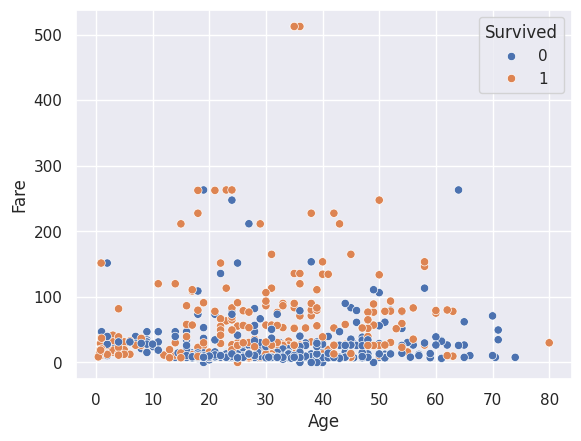

In [2]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)

In [3]:
# Handling missing values for "Age" and "Fare"
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [4]:
# Filtering out the necessary columns for the predictors and converting "Sex" into numerical values for model compatibility
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [5]:
# Extract the columns we'll use for our data

x = df[['Pclass', 'Sex', 'Age', 'Fare']].values # selects the four columns ('Pclass', 'Sex', 'Age', 'Fare') from the dataframe. '.values' converts this column into a NumPy array.
y = df['Survived'].values # selects the third column (Male) from the dataframe. '.values' converts this column into a NumPy array.

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
# Import our model and performance assessement classes from sklearn

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))

print(confusion_matrix(svm_prediction, Y_test))


Accuracy 71.64%
[[160  68]
 [  8  32]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f9e0f52-a306-48e1-a295-478c0b129ff7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>